<a href="https://colab.research.google.com/github/bhargavrakholiya123/ML-Progress/blob/main/ANN_with_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
X_train.shape, X_test.shape


((60000, 28, 28), (10000, 28, 28))

In [3]:
print(y_train[:20])



[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [4]:
X_train = X_train.reshape((X_train.shape[0], 28*28)) / 255.0
X_test = X_test.reshape((X_test.shape[0], 28*28)) / 255.0


In [5]:
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [6]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(784,)),       # 784 input neurons
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')   # 10 outputs for 10 classes
])


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    X_train,
    y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8642 - loss: 0.4635 - val_accuracy: 0.9630 - val_loss: 0.1290
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9669 - loss: 0.1105 - val_accuracy: 0.9653 - val_loss: 0.1134
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.0764 - val_accuracy: 0.9712 - val_loss: 0.0961
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.0517 - val_accuracy: 0.9739 - val_loss: 0.0897
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9722 - val_loss: 0.0985
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9731 - val_loss: 0.0995
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9923 - loss: 0.0250 - val_accuracy: 0.9747 - val_loss: 0.0913
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0219 - 

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9735 - loss: 0.1139
Test Accuracy: 0.9775999784469604


In [17]:
index = 5
image = X_test[index]

prediction = model.predict(image.reshape(1, 784))
print("Predicted:", prediction.argmax())
print("Actual:", y_test[index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted: 1
Actual: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: 4


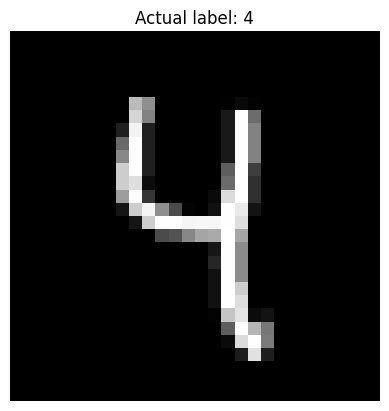

In [22]:
import matplotlib.pyplot as plt

index = 589
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Actual label: {y_test[index]}")
plt.axis('off')

prediction = model.predict(X_test[index].reshape(1, 784))
print("Predicted:", prediction.argmax())
